<a href="https://colab.research.google.com/github/biondo999/Cfd/blob/main/setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2023-09-21 08:36:55--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4581 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.47K  --.-KB/s    in 0s      

2023-09-21 08:36:55 (53.4 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4581/4581]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/4e2d907/rele

In [ ]:
from firedrake import *
import numpy as np
import matplotlib . pyplot as plt

In [ ]:
nx=4
ny=4

mesh = UnitSquareMesh (nx , ny ,
diagonal ='left',
quadrilateral = False )

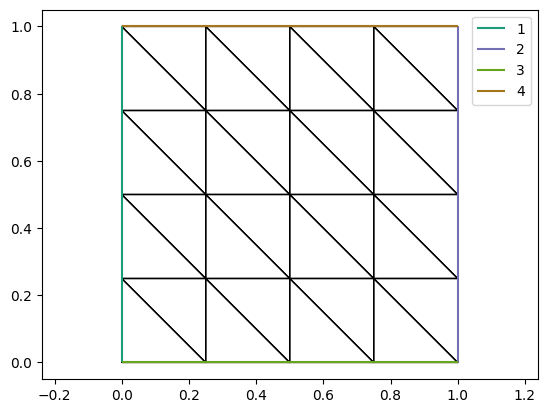

In [ ]:
fig , ax = plt. subplots ()
triplot(mesh , axes =ax)
ax.axis('equal')
ax. legend ()
# n_elem=nx *ny *2
# n_x_points=nx + 1

In [ ]:
# family=’P’/’CG’/Lagrange’  we will use this mostly

SyntaxError: ignored

In [ ]:
V = FunctionSpace (mesh,'P',1)

In [ ]:
#f(x,y)=2(y^2 -1)*exp(-x)
x=SpatialCoordinate(mesh)
f=2*(x[1]**2 -1)* exp(-x[0])

u = TrialFunction (V) # placeholders
v = TestFunction (V) # not func 's-> placeholder function
a = dot ( grad (u), grad (v)) * dx + u * v * dx
L = f * v * dx
u_h = Function (V) # actual function
solve (a == L, u_h)

In [ ]:
a = dot ( grad (u), grad (v)) * dx
+ u * v * dx
L = d * v * ds
# L = d*v * ds (1) + d*v * ds (2)
#+ d*v * ds (3) + d*v * ds (4)
u_h = Function (V)
solve (a == L, u_h)

w₃


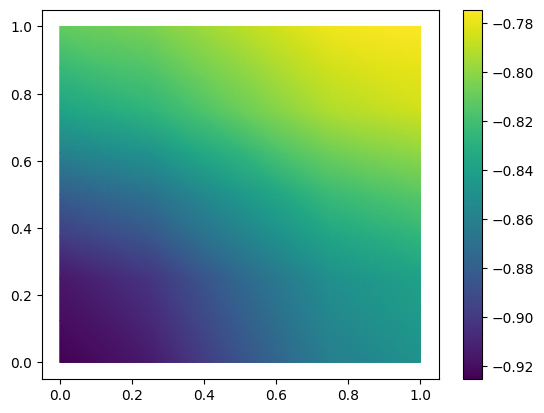

In [ ]:
fig , ax = plt. subplots ()
q = tripcolor (u_h , axes =ax)
fig. colorbar (q) # show the colorbar

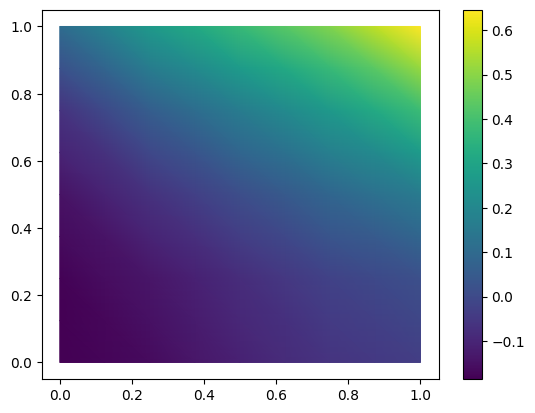

In [ ]:
#ex1

nx=4
ny=4

#mesh creation

mesh = UnitSquareMesh (nx , ny ,
diagonal ='left',
quadrilateral = False )

#function space

V = FunctionSpace (mesh,'P',1)

#forcing term
x=SpatialCoordinate(mesh)


f=2*(x[1]**2 -1)* exp(-x[0])

d_1=-x[1]**2
d_2=x[1]**2
d_3=Constant(0.0) #if is zero put constant or remove it in the var form
d_4=Constant(1.0)   #put.0!!
u = TrialFunction (V) # placeholders
v = TestFunction (V) # not func 's-> placeholder function
a = dot ( grad (u), grad (v)) * dx + 3*u * v * dx

L = f * v * dx + d_1*v*ds(1) + d_2*v*ds(2) + d_3*v*ds(3) + d_4*v *ds(4)

u_h = Function (V) # actual function
solve (a == L, u_h)


fig , ax = plt. subplots ()
q = tripcolor (u_h , axes =ax)
fig. colorbar (q) # show the colorbar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#algebraic calc



A = assemble (a)
rhs = assemble (L)
solver = LinearSolver (A,solver_parameters ={...})
u_h = Function (V)
solver.solve(u_h , rhs)

IndexError: ignored

In [ ]:
#dirichlet bc


x = SpatialCoordinate ( mesh )
g = x [0] * sin(x [1]) # example
bc = DirichletBC (V, g, [1 ,2 ,3 ,4])  #i can have single object DirichletBc and then make a list of them
bcs = list (bc)
solve (a == L, u_h , bcs=bcs,solver_parameters ={...})


